In [4]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from os.path import isfile, join
from os import listdir
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
def analyse_images(path_to_images):
    image_files = [f for f in listdir(path_to_images) if isfile(join(path_to_images, f))]
    df = pd.DataFrame(columns=['file_name', 'channel', 'weigth', 'heigth'])
    count = 0
    for file in image_files:
        img = Image.open(join(path_to_images, file))
        np_shape = np.asarray(img).shape    
        if len(np_shape)==2:
            df.loc[count,:] = [file] + [1, np_shape[0], np_shape[1]]
        else:
            df.loc[count,:] = [file] + [np_shape[2], np_shape[0], np_shape[1]]
        count+=1
    df = df.astype({"channel": int,"weigth": int, "heigth": int})
    return df

In [6]:
# looks for orignal images
path_to_images = 'C:\\Users\\demko_r\\ML\\Electiv_CV\\images2\\'
df = analyse_images(path_to_images)
df[(df.weigth < 200) | (df.heigth < 200)]

,file_name,channel,weigth,heigth
8,333).jfif,3,183,275
14,54353.jfif,3,193,261
17,5556.jfif,3,182,277
19,664888.jfif,3,195,258
22,7563385777.jfif,3,138,364
34,images (1).jfif,3,189,267
35,images (2).jfif,3,183,276
36,images.jfif,3,187,269
47,Без названия.jfif,3,183,275


array([[<AxesSubplot:title={'center':'channel'}>]], dtype=object)

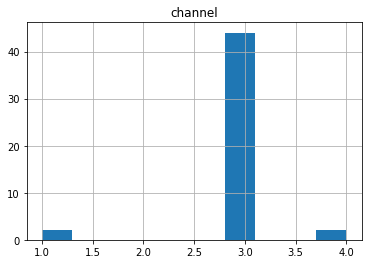

In [7]:
df.hist('channel')

array([[<AxesSubplot:title={'center':'weigth'}>]], dtype=object)

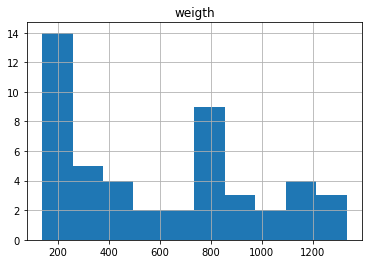

In [8]:
df.hist('weigth')

array([[<AxesSubplot:title={'center':'heigth'}>]], dtype=object)

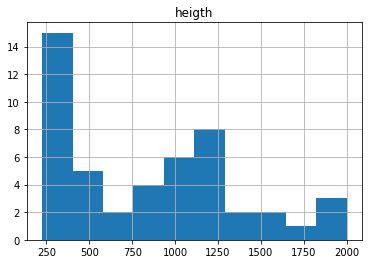

In [9]:
df.hist('heigth')

In [11]:
def rename_images(path_to_images, index):
    image_files = [f for f in listdir(path_to_images) if isfile(join(path_to_images, f))]
    for file in tqdm(image_files,total=len(image_files)):
        sp_file_name = file.split('.')
        os.rename(join(path_to_images, file),join(path_to_images, f'comet_detection_{index}.{sp_file_name[-1]}'))
        index +=1
    print('Done')

def image_pred_proccesing(path_to_images,path_to_preproc_images,ext='jpg'):
    image_files = [f for f in listdir(path_to_images) if isfile(join(path_to_images, f))]
    for file in tqdm(image_files,total=len(image_files)): 
        pil_img = Image.open(join(path_to_images, file)).convert('RGB')
        img_resize = pil_img.resize((500,500))
        # np_arr = np.asarray(pil_img)
        # np_shape = np_arr.shape
        # #print(np_shape)
        # # let's check channel number and convert to 3-channel image
        # if len(np_shape) < 3:
        #     # one channel image
        #     np_arr = np.dstack((np_arr,np_arr,np_arr))
        # elif np_shape[2] == 1:
        #     np_arr = np.concatenate((np_arr,np_arr[:,:,0],np_arr[:,:,0]),axis=2)
        # elif np_shape[2] == 2:
        #     np_arr = np.concatenate((np_arr,np_arr[:,:,0]),axis=2)
        # elif np_shape[2] > 3:
        #     # if channel more than 3, left only firs 3 channels
        #     np_arr = np_arr[:,:,0:3]
        # new_img = Image.fromarray(np_arr,mode = 'RGB')
        
        file, _ = os.path.splitext(file)
        img_resize.save(f'{path_to_preproc_images}{file}.{ext}')
        
path_to_images = 'C:\\Users\\demko_r\\ML\\Electiv_CV\\images2\\'
path_to_preproc_images = 'C:\\Users\\demko_r\\ML\\Electiv_CV\\resize_images\\'
rename_images(path_to_images, index = 200)
image_pred_proccesing(path_to_images,path_to_preproc_images)


100%|██████████| 48/48 [00:00<00:00, 51.12it/s]
